## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
data=pd.read_csv('house.csv',sep=',')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.isnull().sum().sum()

0

In [4]:
data.info()
data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:title={'center':'House Location'}, xlabel='zipcode', ylabel='Frequency'>

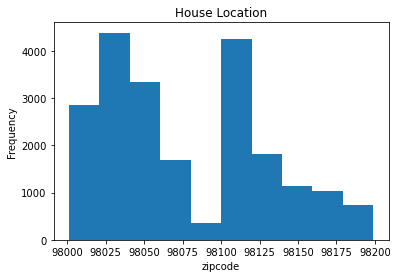

In [5]:
plt.title('House Location')
plt.xlabel('zipcode')
data['zipcode'].plot.hist()

<AxesSubplot:title={'center':'House Price'}, xlabel='price', ylabel='Frequency'>

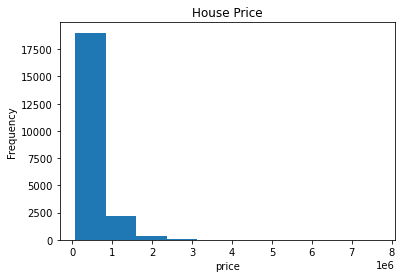

In [6]:
plt.title('House Price')
plt.xlabel('price')
data['price'].plot.hist()

<AxesSubplot:title={'center':'Bar plot Floors'}, xlabel='floors'>

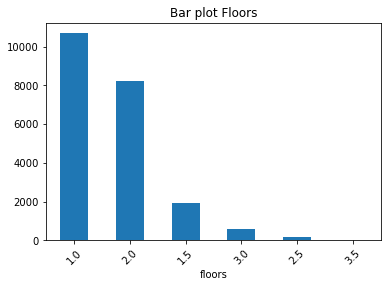

In [7]:
plt.xlabel('floors')
plt.title('Bar plot Floors')
vf=data['floors'].value_counts()
vf.plot.bar(rot=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.5'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5')])

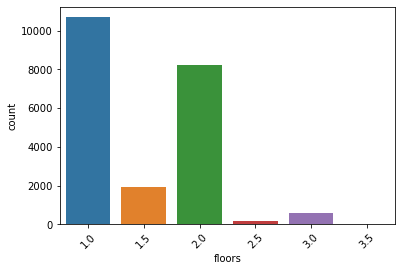

In [8]:
sns.countplot(x='floors',data=data)
plt.xticks(rotation=45)

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

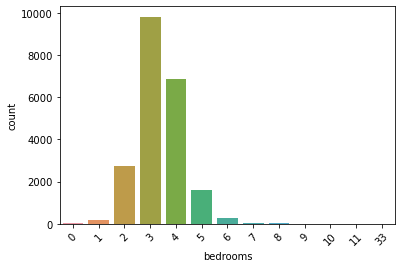

In [9]:
sns.countplot(x='bedrooms',data=data)
plt.xticks(rotation=45)
data['bedrooms'].value_counts()

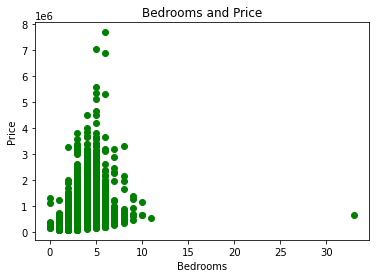

In [10]:
plt.title('Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.scatter(data['bedrooms'],data['price'],color='g')

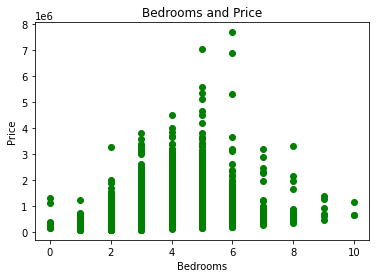

In [11]:
plt.title('Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
data=data[data['bedrooms']!=33]
data=data[data['bedrooms']!=11]
plt.scatter(data['bedrooms'],data['price'],color='g')

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     752
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

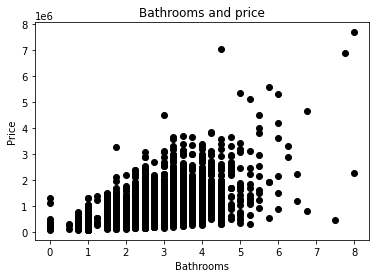

In [12]:
plt.title('Bathrooms and price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.scatter(data['bathrooms'],data['price'],color='k')
data['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     752
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.50       2
6.75       2
6.25       2
Name: bathrooms, dtype: int64

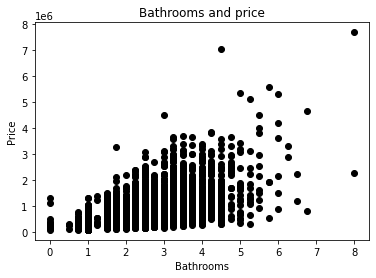

In [13]:
plt.title('Bathrooms and price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
data=data[data['bathrooms']!=7.50]
data=data[data['bathrooms']!=7.75]
plt.scatter(data['bathrooms'],data['price'],color='k')
data['bathrooms'].value_counts()

1300    138
1400    135
1440    133
1800    129
1010    129
       ... 
3065      1
3001      1
4970      1
2905      1
6085      1
Name: sqft_living, Length: 1037, dtype: int64

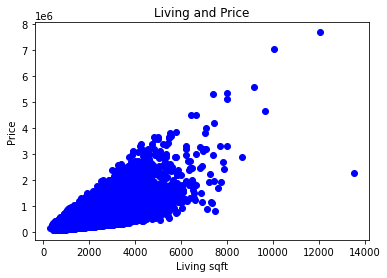

In [14]:
plt.title('Living and Price')
plt.xlabel('Living sqft')
plt.ylabel('Price')
plt.scatter(data['sqft_living'],data['price'],color='b')
data['sqft_living'].value_counts()

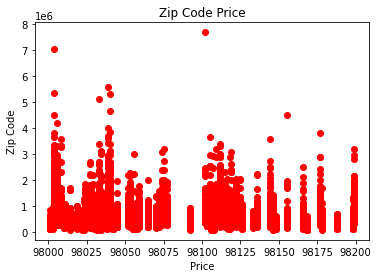

In [15]:
plt.title('Zip Code Price')
plt.xlabel('Price')
plt.ylabel('Zip Code')
plt.scatter(data['zipcode'],data['price'],color='r')

<AxesSubplot:>

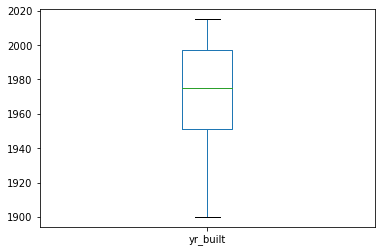

In [16]:
data['yr_built'].plot.box()

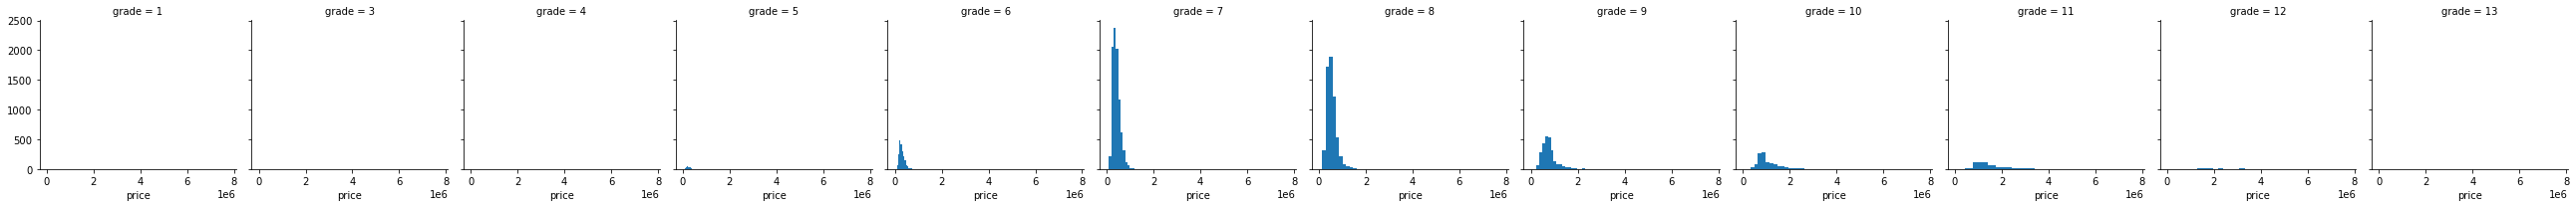

In [17]:
f=sns.FacetGrid(data,col='grade')
f.map(plt.hist,'price',bins=20)

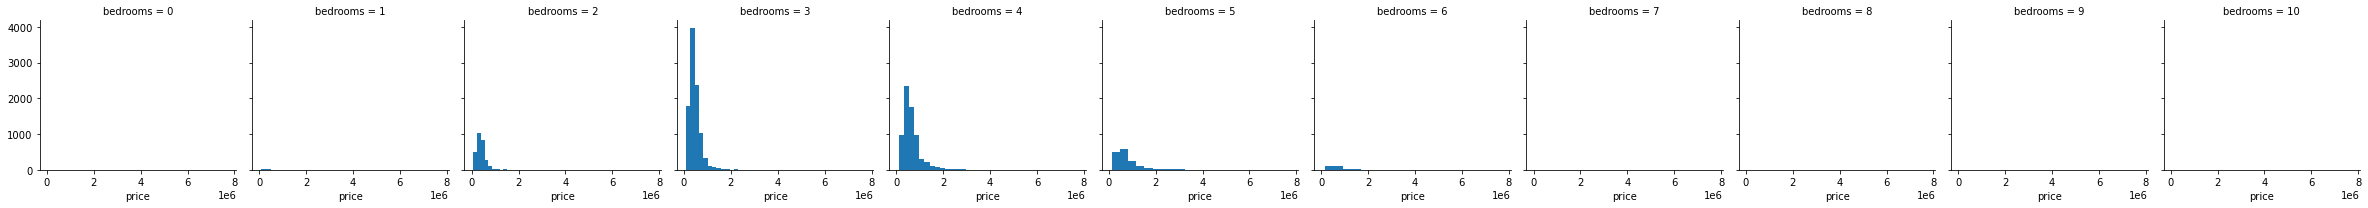

In [18]:
f=sns.FacetGrid(data,col='bedrooms')
f.map(plt.hist,'price', bins=20)

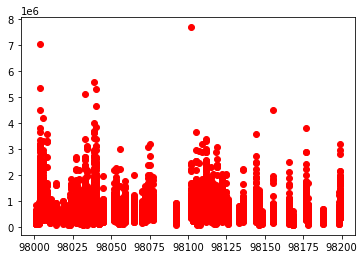

In [19]:
x=data['zipcode'].values[:,np.newaxis]
y=data['price'].values
plt.scatter(x,y,color='r')

## Data Correlation 

In [20]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018187,0.003048,0.005131,-0.012745,-0.132190,0.018532,-0.002728,0.011189,-0.023728,0.007715,-0.011317,-0.005266,0.021257,-0.016709,-0.008049,-0.001883,0.020698,-0.003304,-0.138949
price,-0.018187,1.000000,0.316268,0.524265,0.701395,0.089971,0.257879,0.268301,0.396336,0.037089,0.668770,0.604109,0.324752,0.053589,0.127566,-0.052982,0.308738,0.021929,0.586688,0.082142
bedrooms,0.003048,0.316268,1.000000,0.528429,0.591998,0.032999,0.180830,-0.006558,0.081746,0.026059,0.367451,0.490636,0.310054,0.159942,0.017910,-0.157992,-0.010694,0.134868,0.403914,0.030544
bathrooms,0.005131,0.524265,0.528429,1.000000,0.754206,0.087894,0.501211,0.063958,0.186737,-0.124800,0.665577,0.684449,0.284107,0.506764,0.050769,-0.204542,0.024407,0.223894,0.569233,0.087131
sqft_living,-0.012745,0.701395,0.591998,0.754206,1.000000,0.173012,0.354093,0.104051,0.283388,-0.058472,0.762746,0.876152,0.435264,0.318245,0.055370,-0.199653,0.052425,0.240836,0.756700,0.183230
sqft_lot,-0.132190,0.089971,0.032999,0.087894,0.173012,1.000000,-0.005208,0.021603,0.074654,-0.008937,0.113579,0.183732,0.015266,0.053049,0.007701,-0.129547,-0.085684,0.229511,0.144569,0.718557
floors,0.018532,0.257879,0.180830,0.501211,0.354093,-0.005208,1.000000,0.023708,0.029263,-0.263647,0.458276,0.524361,-0.245794,0.489386,0.006145,-0.059154,0.049628,0.125481,0.279880,-0.011304
waterfront,-0.002728,0.268301,-0.006558,0.063958,0.104051,0.021603,0.023708,1.000000,0.402101,0.016658,0.082828,0.072256,0.080605,-0.026168,0.092951,0.030293,-0.014268,-0.041923,0.086500,0.030705
view,0.011189,0.396336,0.081746,0.186737,0.283388,0.074654,0.029263,0.402101,1.000000,0.046183,0.250530,0.166152,0.276760,-0.053735,0.104140,0.085077,0.006061,-0.078441,0.279818,0.072356
condition,-0.023728,0.037089,0.026059,-0.124800,-0.058472,-0.008937,-0.263647,0.016658,0.046183,1.000000,-0.144607,-0.158087,0.174126,-0.361430,-0.060510,0.003003,-0.015027,-0.106484,-0.092704,-0.003359


<AxesSubplot:>

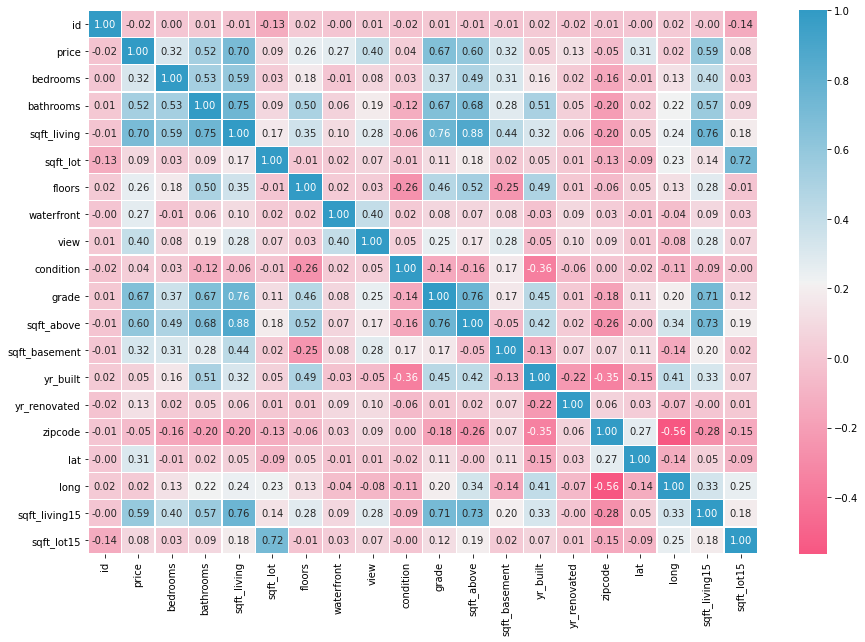

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True),linewidth=0.3, annot=True, fmt='.2f', )

## 3. Split DataSet of House

In [22]:
data_train,data_test=train_test_split(data, test_size=0.2,random_state=30)

## Printing Trainig 

In [23]:
print('Houses Train :',data_train)

Houses Train :                id             date     price  bedrooms  bathrooms  \
15802  2044500213  20150126T000000  449000.0         4       2.00   
13183  1523049207  20140805T000000  161000.0         4       2.00   
20574  6145600557  20140509T000000  212000.0         2       1.50   
11237   808300200  20150319T000000  468000.0         4       2.50   
19303  7237300610  20150303T000000  315000.0         3       2.50   
...           ...              ...       ...       ...        ...   
500    7852170140  20150510T000000  650000.0         4       2.50   
12080  3211100990  20141020T000000  410000.0         4       2.75   
15280  3878900525  20150213T000000  329000.0         3       1.00   
4517   8665900336  20140717T000000  360000.0         3       2.00   
5925   7950300670  20150218T000000  450000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15802         1870      6000     1.5           0     0  ...      7   
13183         17

## Printing Testing

In [24]:
print('Data Test : ',data_test)

Data Test :                 id             date     price  bedrooms  bathrooms  \
20999  7967000150  20140808T000000  353500.0         4       3.00   
20641  5416510200  20140929T000000  384950.0         4       2.50   
7065   1898900280  20140919T000000  340000.0         4       3.00   
21068  3845100620  20141125T000000  400950.0         4       2.50   
6715   8087800430  20150210T000000  602000.0         4       1.75   
...           ...              ...       ...       ...        ...   
16043  9113200250  20150413T000000  840000.0         4       2.50   
6341   2607760680  20150416T000000  490000.0         3       2.50   
13769  8732020770  20140904T000000  263850.0         4       2.25   
2210   2619920030  20150318T000000  760000.0         4       2.50   
17691  7861500150  20141202T000000  389900.0         3       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
20999         2050      4000     2.0           0     0  ...      8   
20641         2380

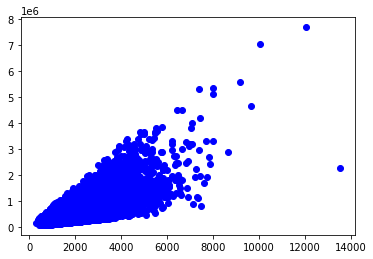

In [25]:
x=data['sqft_living'].values[:,np.newaxis]
y=data['price'].values
plt.scatter(x,y,color='b')

## 4. Lenear Regression 

MSE : 64070689292.68708
R squared : 0.47886545740508024
a : [280.65903775]
b : -43376.1185372154


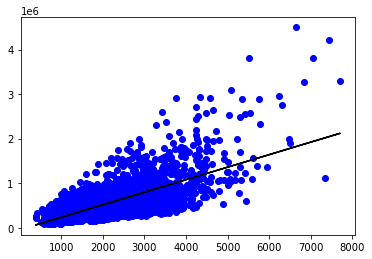

In [26]:
X=data['sqft_living'].values[:,np.newaxis]
Y=data['price'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=30)

model=LinearRegression()
model.fit(X_train,Y_train)
predicted=model.predict(X_test)

print('MSE :',mean_squared_error(Y_test,predicted))
print('R squared :',metrics.r2_score(Y_test,predicted))
print('a :',model.coef_)
print('b :', model.intercept_)
plt.plot(X_test,predicted,color='k')
plt.scatter(X_test,Y_test,color='b')
plt.show()

## 5. Multi-Lenear Regression 

MSE : 56024200340.13012
R squared : 0.5443135333673981
a : [ 2.74885885e+02 -8.32474878e+01  1.02233529e+05 -4.85283139e+04]
b : -502129.0554943067


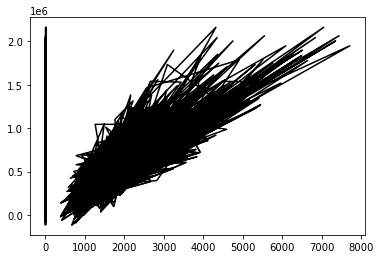

In [27]:
X=data[['sqft_living','sqft_above','grade','bedrooms']]
Y=data['price'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=30)

model=LinearRegression()
model.fit(X_train,Y_train)
predicted=model.predict(X_test)

print('MSE :',mean_squared_error(Y_test,predicted))
print('R squared :',metrics.r2_score(Y_test,predicted))
print('a :',model.coef_)
print('b :', model.intercept_)
plt.plot(X_test,predicted,color='k')
#plt.scatter(X_test,Y_test,color='b')
plt.show()